# Diagonalization

<br>
<br>
<center>
<img src="images/PottermoreDiagonAlley1.jpg" alt="Diagon Alley" width="450">
<br>
"Welcome, Harry, to Diagon Alley"
<P>
<center>
   -- Rubeus Hagrid
</center>

<div style="visibility: hidden"> 
Source:
http://img3.wikia.nocookie.net/__cb20140714004320/harrypotter/images/8/84/PottermoreDiagonAlley1.jpg
</div>

In [11]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [12]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

Today we consider an important factorization of a square matrix.   

This factorization uses eigenvalues and eigenvectors, and makes many problems substantially easier.

The factorization is of the form 

$$A = PDP^{-1}$$

where $D$ is a __diagonal__ matrix.

This factorization allows us to compute $A^k$ quickly for large values of $k,$ which is fundamental to many problems.

Here is an example of why we'd like to do such a thing:

__Example.__  Consider taking the powers of a diagonal matrix.  

For example, $D = \mat{{rr}5&0\\0&3}.$  

Then note that $D^2 = \mat{{rr}5&0\\0&3}\mat{{rr}5&0\\0&3} = \mat{{cc}5^2&0\\0&3^2},$

And $D^3 = DD^2 = \mat{{rr}5&0\\0&3}\mat{{cc}5^2&0\\0&3^2} = \mat{{cc}5^3&0\\0&3^3}.$

So in general,

$$ D^k = \mat{{rr}5^k&0\\0&3^k} \;\;\;\mbox{for}\;k\geq1.$$

__Extending this to a general matrix $A$.__

Now, consider if $A$ is __similar__ to a diagonal matrix.  

For example, let $A = PDP^{-1}$ for some invertible $P$ and diagonal $D$.

Then, $A^k$ is also easy to compute.   

__Example.__ Let $A = \mat{{rr}7&2\\-4&1}.$  

Find a formula for $A^k,$ given that $A = PDP^{-1},$ where

$$P = \mat{{rr}1&1\\-1&-2}\;\mbox{and}\;D = \mat{{cc}5&0\\0&3}.$$

__Solution.__   

The standard formula for the inverse of a $2\times 2$ matrix yields

$$P^{-1} = \mat{{rr}2&1\\-1&-1}$$

Then, by associativity of matrix multiplication,

$$A^2 = (PDP^{-1})(PDP^{-1}) $$

$$= PD(P^{-1}P)DP^{-1}$$

$$ = PDDP^{-1}$$

$$ = PD^2P^{-1}$$

$$ = \mat{{rr}1&1\\-1&-2}\mat{{rr}5^2&0\\0&3^2}\mat{{rr}2&1\\-1&-1}$$

In general, for $k\geq 1,$

$$A^k = PD^kP^{-1}$$

$$=\mat{{rr}1&1\\-1&-2}\mat{{rr}5^k&0\\0&3^k}\mat{{rr}2&1\\-1&-1}$$

$$=\mat{{cc}2\cdot5^k-3^k&5^k-3^k\\2\cdot3^k-2\cdot5^k&2\cdot3^k-5^k}$$

A square matrix $A$ is said to be __diagonalizable__ if $A$ is similar to a diagonal matrix, that is, if 

$$A = PDP^{-1}$$ 

for some invertible matrix $P$ and some diagonal matrix $D$.

## Question Time! Q18.1

Next we will show that to diagonalize a matrix, one __must__ use the eigenvectors and eigenvalues of $A$.

__Theorem.__ (The Diagonalization Theorem)

An $n\times n$ matrix $A$ is diagonalizable if and only if $A$ has $n$ linearly independent eigenvectors.

In fact, $A = PDP^{-1},$ with $D$ a diagonal matrix, if and only if the columns of $P$ are $n$ linearly independent eigenvectors of $A.$  

In this case, the diagonal entires of $D$ are eigenvalues of $A$ that correspond, respectively, to the eigenvectors in $P$.

 In other words, $A$ is diagonalizable if and only if there are enough eigenvectors to form a basis of $\R^n$.  
 
We call such a basis an __eigevector basis__ or an __eigenbasis__ of $\R^n$.

__Proof.__

First, observe that if $P$ is any $n\times n$ matrix with columns $\vv_1,\dots,\vv_n,$ and if $D$ is any diagonal matrix with diagonal entries $\lambda_1,\dots,\lambda_n,$ then

$$AP = A[\vv_1\;\vv_2\;\cdots\;\vv_n] = [A\vv_1\;A\vv_2\;\cdots\;A\vv_n]$$

while

$$PD = P\mat{{cccc}\lambda_1&0&\cdots&0\\0&\lambda_2&\cdots&0\\\vdots&\vdots&\ddots&\vdots\\0&0&\cdots&\lambda_n} = [\lambda_1\vv_1\;\lambda_2\vv_2\;\cdots\;\lambda_n\vv_n].$$

Now suppose $A$ is diagonalizable and $A = PDP^{-1}.$  Then right-multiplying this relation by P, we have 

$$AP = PD$$

In this case, the calculations above show that

$$[A\vv_1\;A\vv_2\;\cdots\;A\vv_n] = [\lambda_1\vv_1\;\lambda_2\vv_2\;\cdots\;\lambda_n\vv_n].$$

Equating columns, we find that

$$A\vv_1 = \lambda_1\vv_1, \;\;\; A\vv_2 = \lambda_2\vv_2, \;\;\; \dots, \;\;\; A\vv_n = \lambda_n\vv_n$$

Since $P$ is invertible, its columns $\vv_1, \dots,\vv_n$ must be linearly independent.  

Also, since these columns are nonzero, the equations above show that $\lambda_1, \dots, \lambda_n$ are eigenvalues and $\vv_1, \dots, \vv_n$ are the corresponding eigenvectors.  

This proves the "only if" part of the theorem.

To prove the "if" part of the theorem is straightforward:  given an $n$ eigenvectors $\vv_1,\dots,\vv_n,$ use them to construct the columns of $P$ and use corresponding eigenvalues $\lambda_1, \dots, \lambda_n$ to construct $D$.  

Using the sequence of equations above in reverse order, we can go from 

$$A\vv_1 = \lambda_1\vv_1, \;\;\; A\vv_2 = \lambda_2\vv_2, \;\;\; \dots, \;\;\; A\vv_n = \lambda_n\vv_n$$

to 

$$AP = PD.$$

Since the eigenvectors are given as linearly idenpendent, $P$ is invertible and so 

$$A = PDP^{-1}.$$

The takeaway is this:

Every $n\times n$ matrix having $n$ linearly independent eigenvectors can be factored into the product of a matrix $P$, a diagonal matrix $D$, and the inverse of $P$ - where $P$ holds the eigenvectors of $A$, and $D$ holds the eigenvalues of $A$.

This is the __eigendecomposition__ of $A$.   

(It is quite fundamental!)

## Question Time! Q18.2

## Diagonalizing a Matrix

Let's put this all together and see how to diagonalize a matrix.

__Example.__  Diagonalize the following matrix, if possible.

$$A = \mat{{rrr}1&3&3\\-3&-5&-3\\3&3&1}$$

That is, find an invertible matrix $P$ and a diagonal matrix $D$ such that $A = PDP^{-1}.$

__Solution.__

__Step 1: Find the eigenvalues of $A$.__

This is routine for us now.  If we are working with $2\times2$ matrices, we may choose to find the roots of the characteristic polynomial (quadratic).  For anything larger we'd use a computer.

In this case, the characteristic equation turns out to involve a cubic polynomial that can be factored:

$$0 = \det(A-\lambda I) $$

$$ = -\lambda^3 - 3\lambda^2 + 4$$

$$ = -(\lambda -1)(\lambda +2)^2$$

So the eigenvalues are $\lambda = 1$ and $\lambda = -2$ (with multiplicity two).

__Step 2: Find three linearly independent eigenvectors of $A$.__

Note that we need _three_ linearly independent vectors because $A$ is $3\times3.$  

This is the step at which, if $A$ cannot be diagonalized, we find out because we cannot form 3 independent eigenvectors.

Using our standard method (finding the nullspace of $A - \lambda I$) we find a basis for each eigenspace:

Basis for $\lambda = 1$: $\vv_1 = \mat{{r}1\\-1\\1}.$

Basis for $\lambda = -2$: $\vv_2 = \mat{{r}-1\\1\\0}$ and $\vv_3 = \mat{{r}-1\\0\\1}.$

Check that $\{\vv_1, \vv_2, \vv_3\}$ forms a linearly independent set.

__Step 3: Construct $P$ from the vectors in Step 2.__

The order of the vectors is actually not important.

$$P = [\vv_1\;\vv_2\;\vv_3] = \mat{{rrr}1&-1&-1\\-1&1&0\\1&0&1}.$$

__Step 4: Construct $D$ from the corresponding eigenvalues.__

The order of eigenvalues must match the order of eigenvectors used in the previous step.

If an eigenvalue has multiplicity greater than 1, then repeat it the corresponding number of times.

$$D = \mat{{rrr}1&0&0\\0&-2&0\\0&0&-2}.$$

And we are done.   We have diagonalized $A$:

$$A =  \mat{{rrr}1&3&3\\-3&-5&-3\\3&3&1} = \mat{{rrr}1&-1&-1\\-1&1&0\\1&0&1}  \mat{{rrr}1&0&0\\0&-2&0\\0&0&-2}\mat{{rrr}1&-1&-1\\-1&1&0\\1&0&1}^{-1}$$

So, just as a reminder, we can now take powers of $A$ quite efficiently:

$$A^{100} = \mat{{rrr}1&-1&-1\\-1&1&0\\1&0&1}  \mat{{rrr}1^{100}&0&0\\0&(-2)^{100}&0\\0&0&(-2)^{100}}\mat{{rrr}1&-1&-1\\-1&1&0\\1&0&1}^{-1}$$

__Example.__   Let's look at an example of how diagonalization can fail.

Diagonalize the following matrix, if possible.

$$A = \mat{{rrr}2&4&3\\-4&-6&-3\\3&3&1}.$$

__Solution.__ The characteristic equation of $A$ turns out to be the same as in the last example:

$$0 = \det(A-\lambda I) = -(\lambda-1)(\lambda +2)^2$$

The eigenvalues are $\lambda = 1$ and $\lambda = -2.$  However, it is easy to verify that each eigenspace is only one-dimensional:

Basis for $\lambda_1 = 1$: $\vv_1 = \mat{{r}1\\-1\\1}.$

Basis for $\lambda_2 = -2$: $\vv_2 = \mat{{r}-1\\1\\0}.$

There are not other eigenvalues, and every eigenvector of $A$ is a multiple of either $\vv_1$ or $\vv_2.$  

Hence it is impossible to construct a basis of $\R^3$ using eigenvectors of $A$. 

So we conclude that $A$ is __not__ diagonalizable.

__An Important Case.__

There is an important situation in which we can conclude immediately that $A$ is diagonalizable, without explicitly constructing and testing the eigenspaces of $A$.

__Theorem.__

An $n\times n$ matrix with $n$ distinct eigenvalues is diagonalizable.

__Proof.__

There is a straightforward proof in the book showing that any set of eigenvectors corresponding to distinct eigenvalues is linearly independent.   Using that fact here, we have $n$ linearly independent eigenvectors, so $A$ must be diagonalizable.

__Example.__

Determine if the following matrix is diagonalizable.

$$A = \mat{{rrr}5&-8&1\\0&0&7\\0&0&-2}.$$

__Solution.__

It's easy!  Since $A$ is triangular, its eigenvalues are $5, 0,$ and $-2$.  Since $A$ is a $3\times3$ with 3 distinct eigenvalues, $A$ is diagonalizable.

## Question Time! Q18.3

## Change of Basis

We can interpret $A = PDP^{-1}$ in terms of how $A$ acts as a linear operator.

When thinking of $A$ as a linear operator, diagonalization has a specific interpretation: __it separates the influence of each vector component from the others.__

Intuitively, the point to see is that when we multiply a vector $\vx$ by a diagonal matrix $D$, the change to each component of $\vx$ depends only on that component.  

On the other hand, when we multiply by a matrix $A$ that has off-diagonal entries, the components of $\vx$ affect each other.

This allows us to bring intuition to the problem, and simplifies computation.

__Interpreting Diagonalization Geometrically__

When we compute $P\vx,$ we are taking a vector sum of the columns of $P$:

$$P\vx = \vp_1 x_1 + \vp_2 x_2 + \dots \vp_n x_n.$$

Now $P$ is invertible, so its columns are a basis for $\R^n$.  Let's say  $\mathcal{B} = \{\vp_1, \vp_2, \dots, \vp_n\}.$  

So, we can think of $P\vx$ as "the point that has coordinates $\vx$ in the basis $\mathcal{B}$."   

We write this statement as $P\vx = [\vx]_\mathcal{B}.$

What about $P^{-1}$?   

Since $P^{-1}P\vx = \vx,$ then $P^{-1}\vx$ is "the coordinates of $\vx$ in the basis $\mathcal{B}$"

So we can interpret $PDP^{-1}\vx$ as:

1) Compute the coordinates of $\vx$ in the basis $\mathcal{B}$.   

This is $P^{-1}\vx.$

2) Scale those coordinates according to the diagonal matrix $D$.   

This is $DP^{-1}\vx.$

3) Find the point that has those scaled coordinates in the basis $\mathcal{B}.$ 
 
This is $PDP^{-1}\vx.$
    

Let's visualize diagonalization geometrically.

Here is $A$ transforming a point $\vx = \mat{{rr}2.47\\1.25}$.

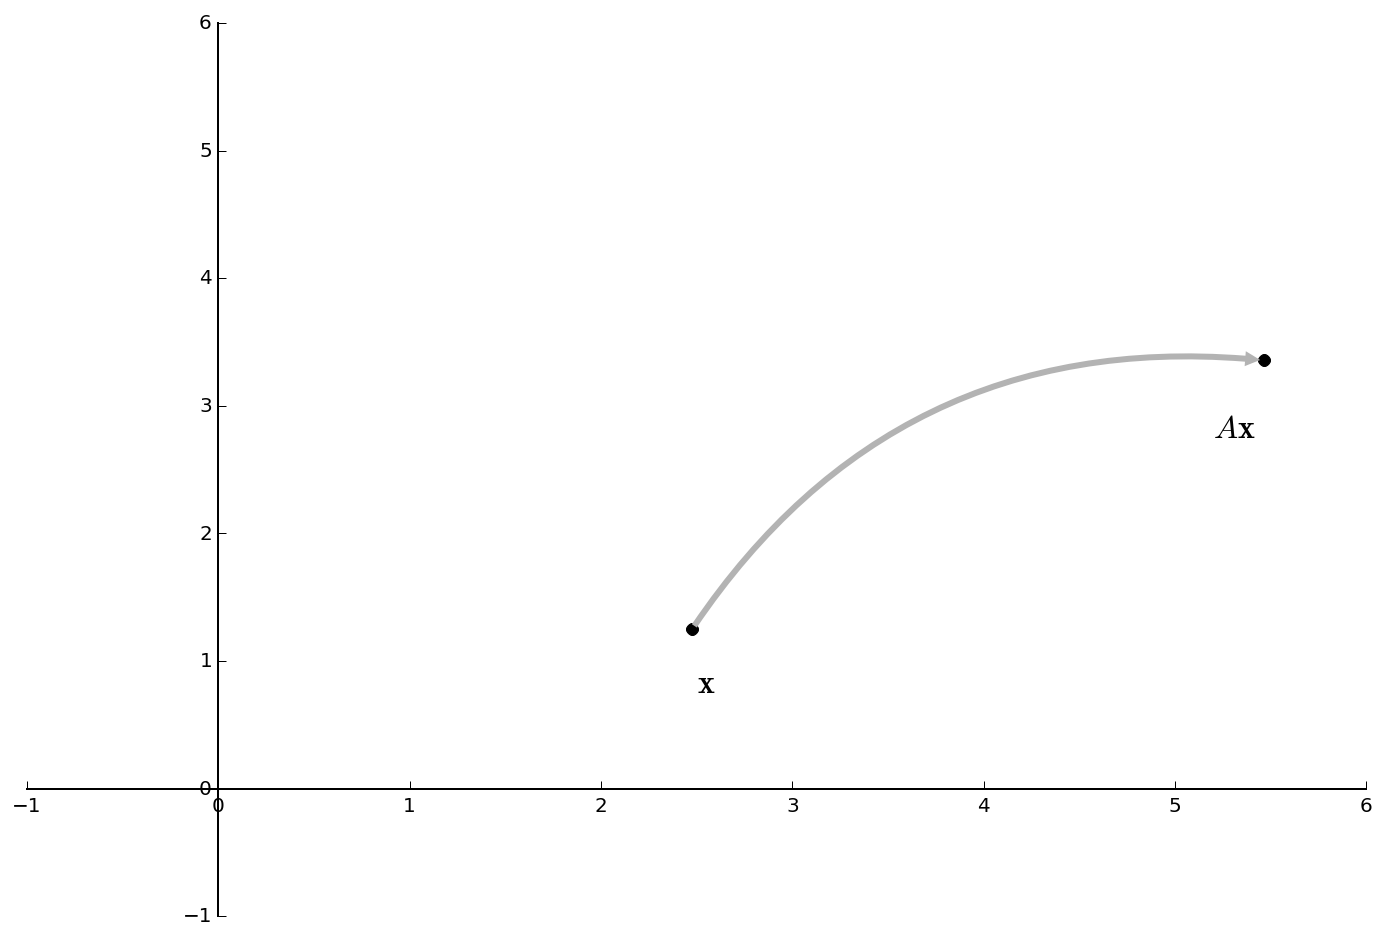

In [13]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-1,6,-1,6,size=(12,8))
ut.centerAxes(ax)
v1 = np.array([5.0,1.0])
v1 = v1 / np.sqrt(np.sum(v1*v1))
v2 = np.array([3.0,5.0])
v2 = v2 / np.sqrt(np.sum(v2*v2))
# ut.plotVec(ax,v1,'b')
# ut.plotVec(ax,v2)
# ut.plotLinEqn(-v1[1],v1[0],0,color='b')
# ut.plotLinEqn(-v2[1],v2[0],0,color='r')
# for i in range(-4,8):
#    ut.plotLinEqn(-v1[1],v1[0],i*(v1[0]*v2[1]-v1[1]*v2[0]),format=':',color='b')
#    ut.plotLinEqn(-v2[1],v2[0],i*(v2[0]*v1[1]-v2[1]*v1[0]),format=':',color='r')
p1 = 2*v1+v2
p2 = 4*v1+3*v2
ut.plotVec(ax, p1,'k')
ut.plotVec(ax, p2,'k')
ax.annotate('', xy=(p2[0], p2[1]),  xycoords='data',
                xytext=(p1[0], p1[1]), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0.7', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=-0.3'},
                )
ax.text(2.5,0.75,r'${\bf x}$',size=16)
ax.text(5.2,2.75,r'$A{\bf x}$',size=16)
ax.plot(0,0,'')
print('')

Now, let's compute $P^{-1}\vx.$

This is the coordinates of the point $\vx$ in the basis $\mathcal{B}:$

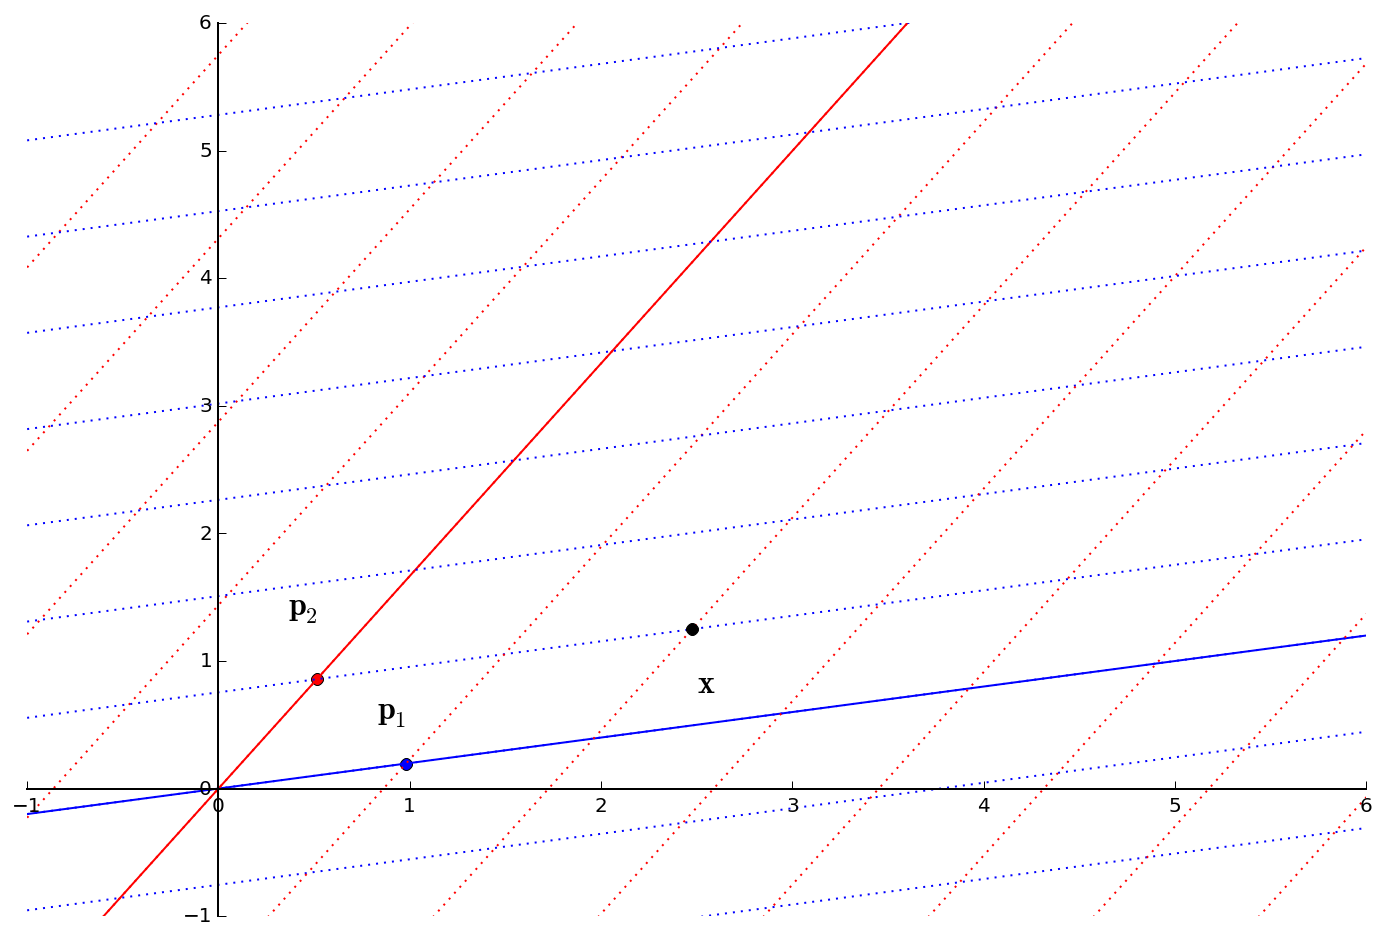

In [14]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-1,6,-1,6,size=(12,8))
ut.centerAxes(ax)
v1 = np.array([5.0,1.0])
v1 = v1 / np.sqrt(np.sum(v1*v1))
v2 = np.array([3.0,5.0])
v2 = v2 / np.sqrt(np.sum(v2*v2))
ut.plotVec(ax,v1,'b')
ut.plotVec(ax,v2)
ut.plotLinEqn(-v1[1],v1[0],0,color='b')
ut.plotLinEqn(-v2[1],v2[0],0,color='r')
for i in range(-4,8):
    ut.plotLinEqn(-v1[1],v1[0],i*(v1[0]*v2[1]-v1[1]*v2[0]),format=':',color='b')
    ut.plotLinEqn(-v2[1],v2[0],i*(v2[0]*v1[1]-v2[1]*v1[0]),format=':',color='r')
p1 = 2*v1+v2
p2 = 4*v1+3*v2
ut.plotVec(ax, p1,'k')
#ut.plotVec(ax, p2,'k')
#ax.annotate('', xy=(p2[0], p2[1]),  xycoords='data',
#                xytext=(p1[0], p1[1]), textcoords='data',
#                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
#                arrowprops={'arrowstyle': 'simple',
#                                'fc': '0.7', 
#                                'ec': 'none',
#                                'connectionstyle' : 'arc3,rad=-0.3'},
#                )
ax.text(2.5,0.75,r'${\bf x}$',size=16)
ax.text(v2[0]-0.15,v2[1]+0.5,r'${\bf p_2}$',size=16)
ax.text(v1[0]-0.15,v1[1]+0.35,r'${\bf p_1}$',size=16)
#ax.text(5.2,2.75,r'$A{\bf x}$',size=16)
ax.plot(0,0,'')
print('')

The coordinates of $\vx$ in this basis are (2,1).  

In other words $\vx = \mat{{r}2\\1}_\mathcal{B}.$

Now, we compute $DP^{-1}\vx.$  Since $D$ is diagonal, this is just scaling $[\vx]_\mathcal{B}$.  

In this example the eigenvalue corresponding to $\vp_1$ is 2, and the eigenvalue corresponding to $\vp_2$ is 3.

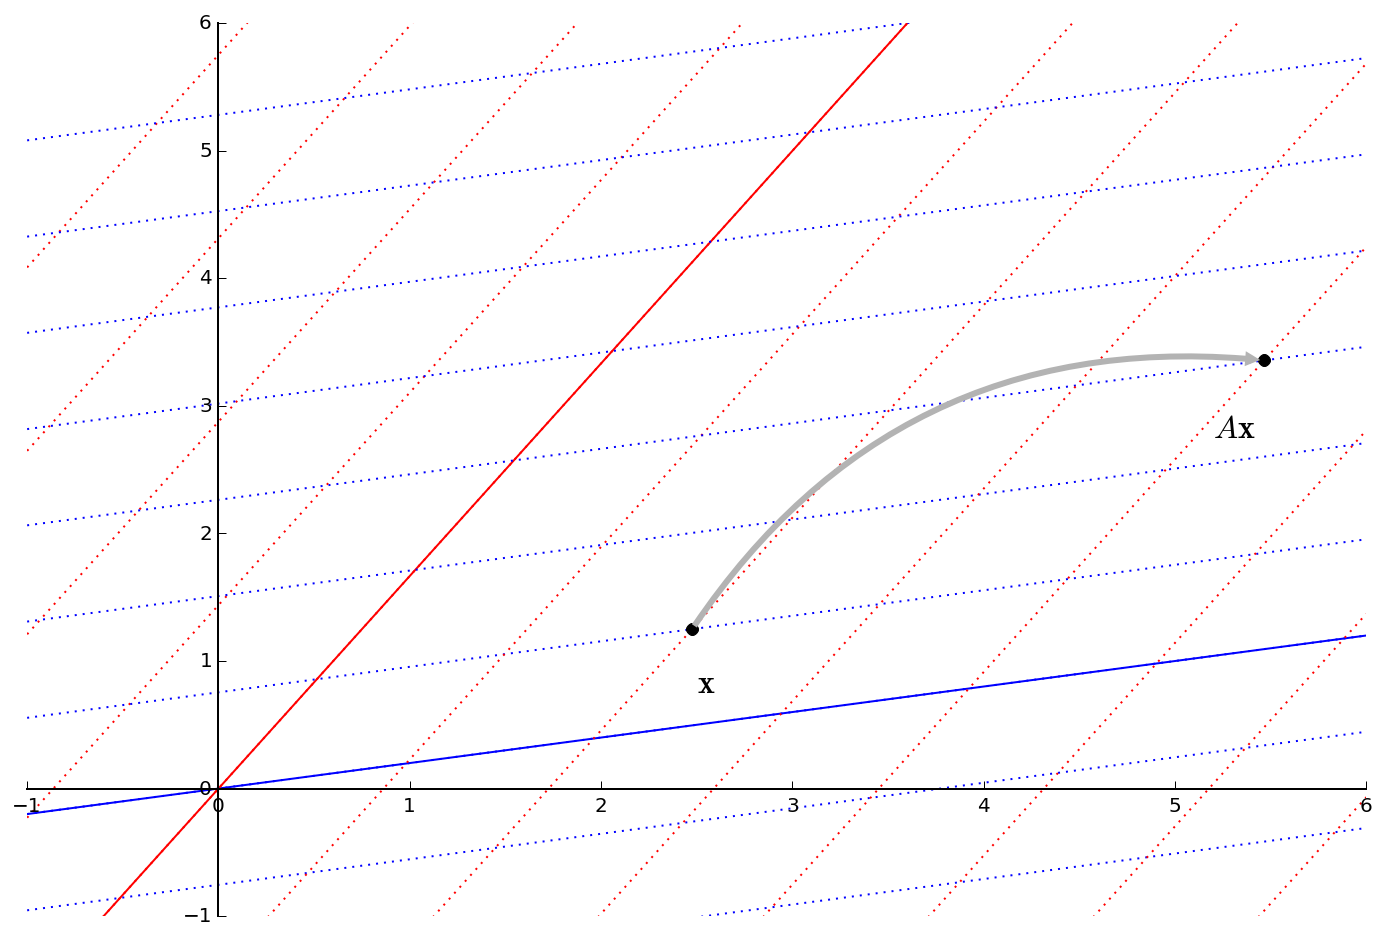

In [15]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-1,6,-1,6,size=(12,8))
ut.centerAxes(ax)
v1 = np.array([5.0,1.0])
v1 = v1 / np.sqrt(np.sum(v1*v1))
v2 = np.array([3.0,5.0])
v2 = v2 / np.sqrt(np.sum(v2*v2))
#ut.plotVec(ax,v1,'b')
#ut.plotVec(ax,v2)
ut.plotLinEqn(-v1[1],v1[0],0,color='b')
ut.plotLinEqn(-v2[1],v2[0],0,color='r')
for i in range(-4,8):
    ut.plotLinEqn(-v1[1],v1[0],i*(v1[0]*v2[1]-v1[1]*v2[0]),format=':',color='b')
    ut.plotLinEqn(-v2[1],v2[0],i*(v2[0]*v1[1]-v2[1]*v1[0]),format=':',color='r')
p1 = 2*v1+v2
p2 = 4*v1+3*v2
ut.plotVec(ax, p1,'k')
ut.plotVec(ax, p2,'k')
ax.annotate('', xy=(p2[0], p2[1]),  xycoords='data',
                xytext=(p1[0], p1[1]), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0.7', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=-0.3'},
                )
ax.text(2.5,0.75,r'${\bf x}$',size=16)
ax.text(5.2,2.75,r'$A{\bf x}$',size=16)
ax.plot(0,0,'')
print('')

So the coordinates of $A\vx$ in the basis $\mathcal{B}$ are $\mat{{r}4\\3}_\mathcal{B}.$

Now we convert back to the standard basis -- that is, we ask which point has coordinates (4,3) in basis $\mathcal{B}.$

We rely on the definition $[\vv]_\mathcal{B} = P\vv.$

So $A\vx = P\mat{{r}4\\3} = PDP^{-1}\vx.$

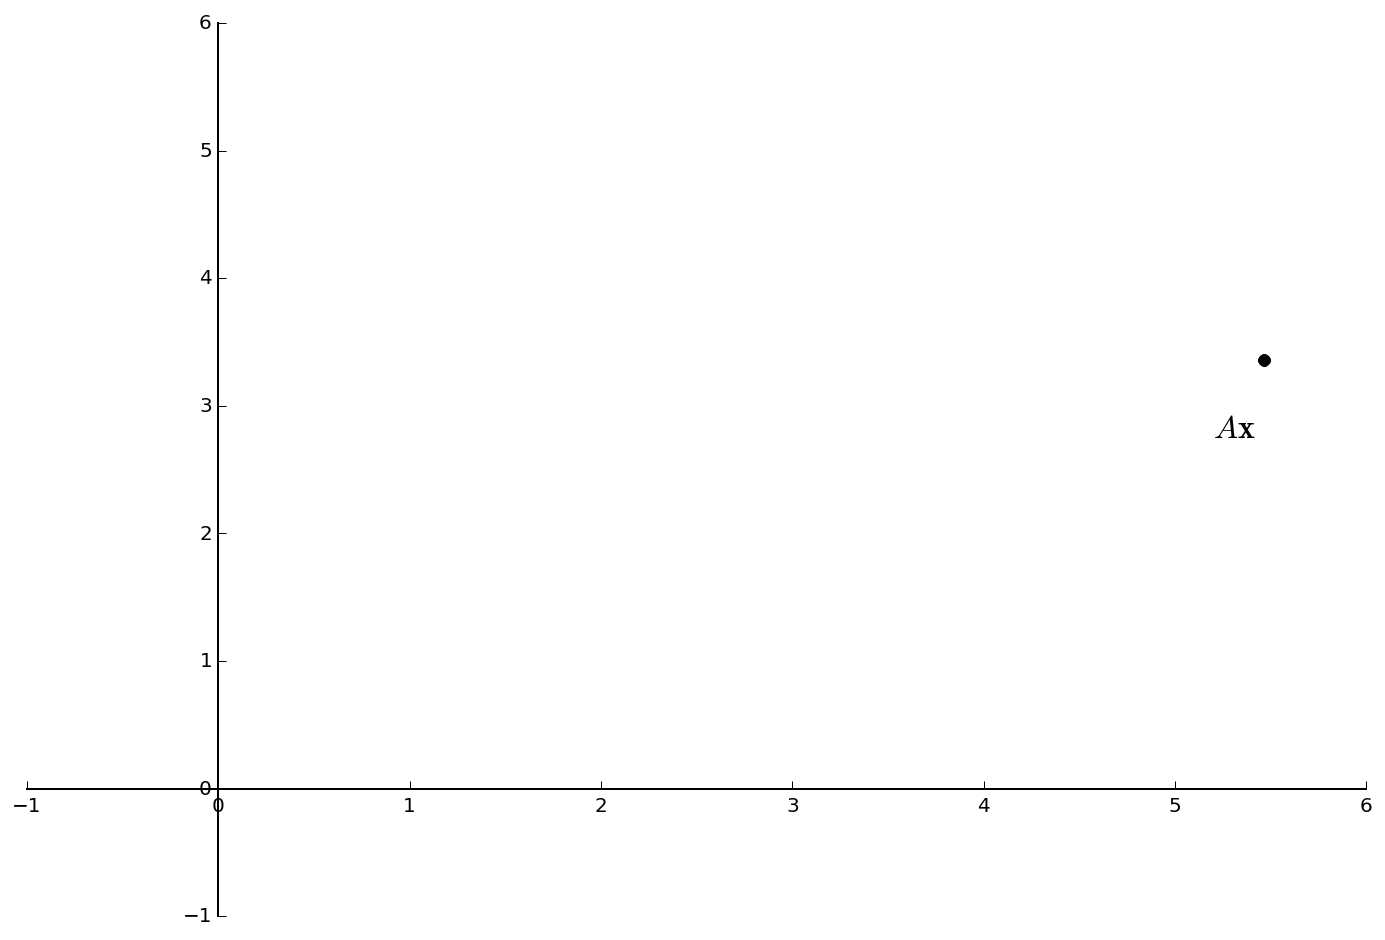

In [16]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-1,6,-1,6,size=(12,8))
ut.centerAxes(ax)
v1 = np.array([5.0,1.0])
v1 = v1 / np.sqrt(np.sum(v1*v1))
v2 = np.array([3.0,5.0])
v2 = v2 / np.sqrt(np.sum(v2*v2))
#ut.plotVec(ax,v1,'b')
#ut.plotVec(ax,v2)
#ut.plotLinEqn(-v1[1],v1[0],0,color='b')
#ut.plotLinEqn(-v2[1],v2[0],0,color='r')
#for i in range(-3,8):
#    ut.plotLinEqn(-v1[1],v1[0],i*(v1[0]*v2[1]-v1[1]*v2[0]),format=':',color='b')
#    ut.plotLinEqn(-v2[1],v2[0],i*(v2[0]*v1[1]-v2[1]*v1[0]),format=':',color='r')
p1 = 2*v1+v2
p2 = 4*v1+3*v2
#ut.plotVec(ax, p1,'k')
ut.plotVec(ax, p2,'k')
#ax.annotate('', xy=(p2[0], p2[1]),  xycoords='data',
#                xytext=(p1[0], p1[1]), textcoords='data',
#                size=15,
#                #bbox=dict(boxstyle="round", fc="0.8"),
#                arrowprops={'arrowstyle': 'simple',
#                                'fc': '0.7', 
#                                'ec': 'none',
#                                'connectionstyle' : 'arc3,rad=-0.3'},
#                )
#ax.text(2.5,0.75,r'${\bf x}$',size=16)
ax.text(5.2,2.75,r'$A{\bf x}$',size=16)
ax.plot(0,0,'')
print('')

We find that $A\vx$ = $PDP^{-1}\vx = \mat{{r}5.46\\3.35}.$

In conclusion: notice that the transformation $\vx \mapsto A\vx$ may be a complicated one in which each component of $\vx$ affects each component of $A\vx$.   

However, by changing to the basis defined by the eigenspaces of $A$, the action of $A$ becomes simple to understand. 

Diagonalization of $A$ __changes to a basis in which the action of $A$ is particularly easy to understand and compute with.__